In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from adaline_classifier import AdalineGD

In [2]:
# Preprocess iris data (take only two classes)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
trainset = df.iloc[:100, [0,2]].values
target = df.iloc[:100,4].values
target = np.where(target == 'Iris-setosa', -1, 1)

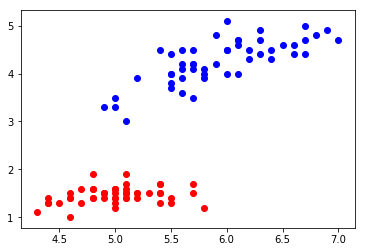

In [3]:
# Plot iris data
plt.scatter(trainset[:50, 0], trainset[:50, 1], color='red')
plt.scatter(trainset[50:, 0], trainset[50:, 1], color='blue')
plt.show()

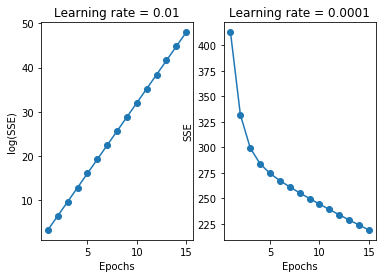

In [4]:
# Test learning process with learning rate = 0.01 and 0.0001.
# Plot epochs vs SSE graph
adaline1 = AdalineGD(n_iters=15, learning_rate=0.01).fit(trainset, target)
adaline2 = AdalineGD(n_iters=15, learning_rate=0.0001).fit(trainset, target)
plt.subplot(121)
plt.plot(range(1, adaline1.n_iters+1), np.log10(adaline1.cost_), marker='o')
plt.title('Learning rate = 0.01')
plt.xlabel('Epochs'), plt.ylabel('log(SSE)')
plt.subplot(122)
plt.plot(range(1, adaline2.n_iters+1), adaline2.cost_, marker='o')
plt.title('Learning rate = 0.0001')
plt.xlabel('Epochs'), plt.ylabel('SSE')
plt.show()

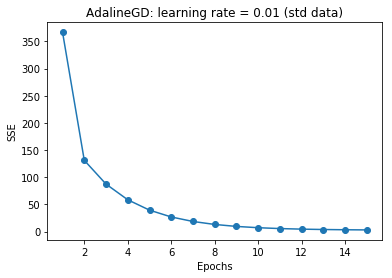

In [7]:
# Now make all given data standardized
# (for standardizing j-th feature we need to 
# substract the sample mean from every training sample
# and divide it by its standart deviation)
std_trainset = np.copy(trainset)
std_trainset[:, 0] = (trainset[:, 0] - np.mean(trainset[:, 0])) / np.std(trainset[:, 0])
std_trainset[:, 1] = (trainset[:, 1] - np.mean(trainset[:, 1])) / np.std(trainset[:, 1])
# Train again with standardized data
adaline1 = AdalineGD(n_iters=15, learning_rate=0.01).fit(std_trainset, target)
plt.plot(range(1, adaline1.n_iters+1), adaline1.cost_, marker='o')
plt.title('AdalineGD: learning rate = 0.01 (std data)')
plt.xlabel('Epochs'), plt.ylabel('SSE')
plt.show()